In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

In [7]:
cols = df.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
for col in cols:
    print(df[col].value_counts())

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
2

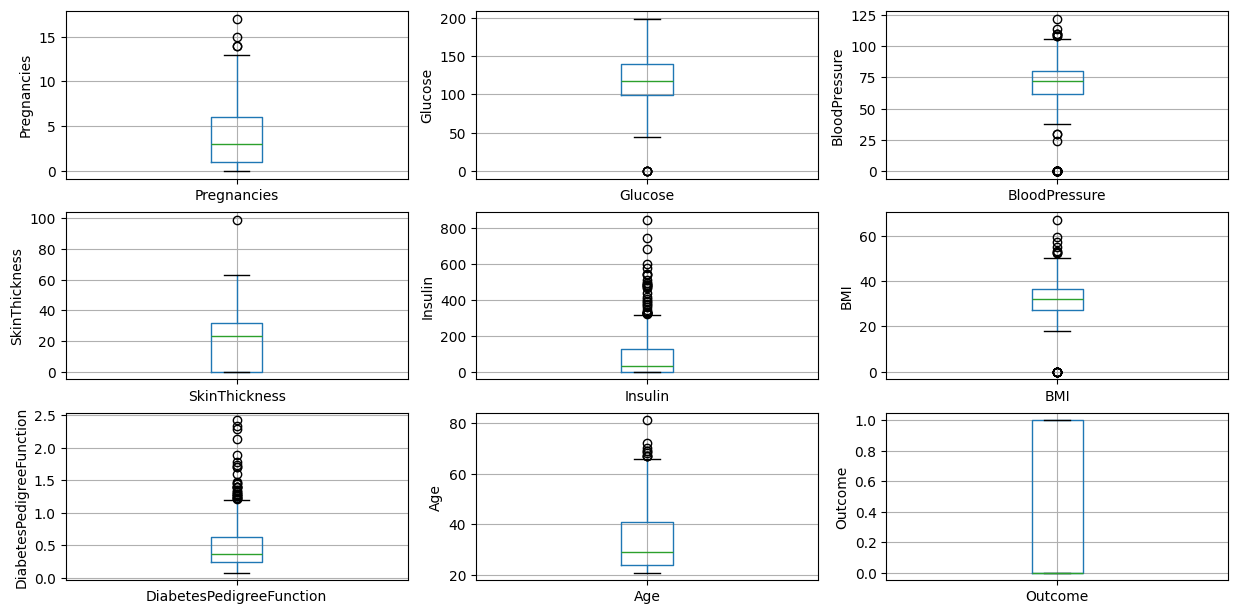

In [75]:
plt.figure(figsize=(15,10))

i = 1
for col in cols:
    plt.subplot(4,3,i)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)
    i+=1




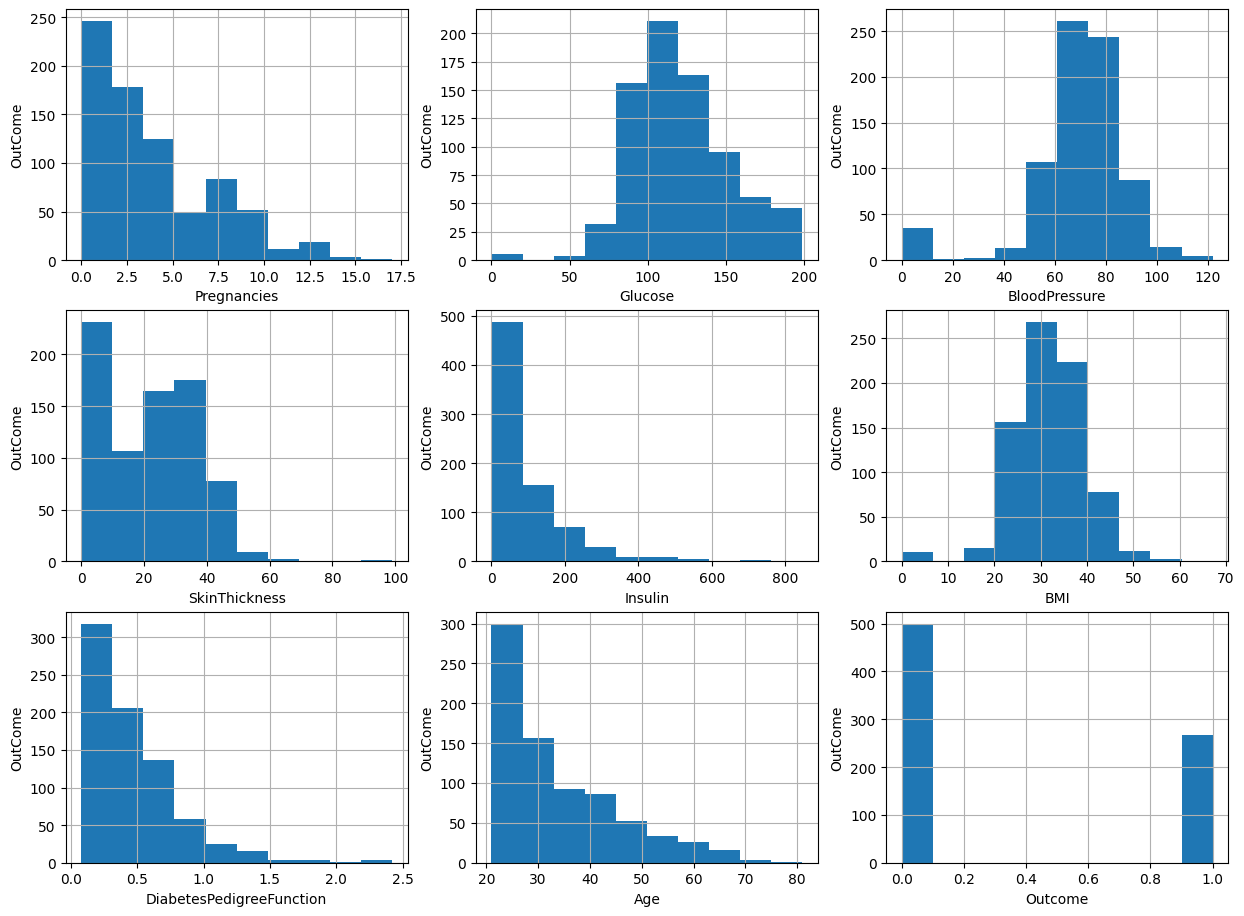

In [78]:
plt.figure(figsize=(15,15))

i=1
for col in cols:
    plt.subplot(4,3,i)
    fig = df[col].hist(bins=10)
    fig.set_xlabel(col)
    fig.set_ylabel('OutCome')
    i+=1


In [85]:
for col in cols:    
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    Lower_fence = df[col].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df[col].quantile(0.75) + (IQR * 1.5)
    print(col,' outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    df[col] = np.where(df[col]>Upper_fence,Upper_fence,df[col])
    print(len(df[df[col]>Upper_fence]))

Pregnancies  outliers are values < -6.5 or > 13.5
0
Glucose  outliers are values < 37.125 or > 202.125
0
BloodPressure  outliers are values < 35.0 or > 107.0
0
SkinThickness  outliers are values < -48.0 or > 80.0
0
Insulin  outliers are values < -190.875 or > 318.125
0
BMI  outliers are values < 13.35 or > 50.550000000000004
0
DiabetesPedigreeFunction  outliers are values < -0.32999999999999996 or > 1.2
0
Age  outliers are values < -1.5 or > 66.5
0
Outcome  outliers are values < -1.5 or > 2.5
0


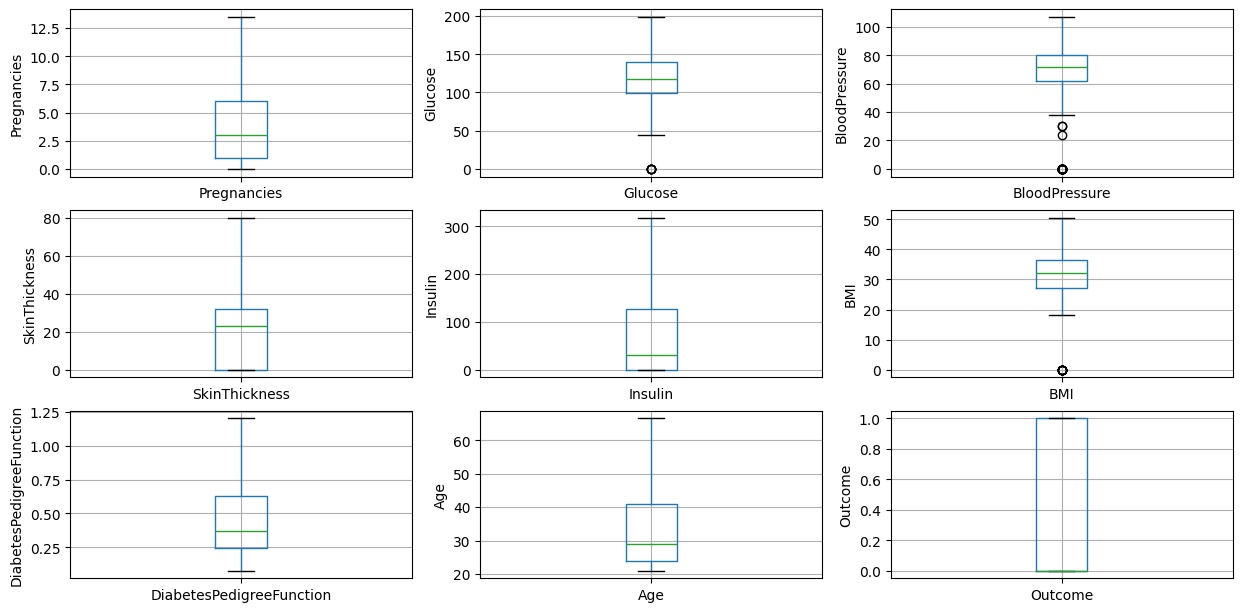

In [86]:
plt.figure(figsize=(15,10))

i = 1
for col in cols:
    plt.subplot(4,3,i)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)
    i+=1




In [87]:
X = df.drop(['Outcome'],axis=1)
Y = df['Outcome']


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=33,random_state=42)

In [89]:
X_train.shape,X_test.shape

((735, 8), (33, 8))

In [105]:
from sklearn.tree import DecisionTreeClassifier

dtc_gini = DecisionTreeClassifier(criterion='gini',max_depth=2)
dtc_gini.fit(X_train,Y_train)
Y_predict = dtc_gini.predict(X_test)


In [106]:
from sklearn.metrics import accuracy_score
print("Model accuracy score : ",accuracy_score(Y_test,Y_predict))

Model accuracy score :  0.7575757575757576


In [107]:
Y_predict_train = dtc_gini.predict(X_train)
print("Model accuracy for training data: ",accuracy_score(Y_train,Y_predict_train))
print("Mode accuracy score for testing data: ",accuracy_score(Y_predict,Y_test))

Model accuracy for training data:  0.7727891156462585
Mode accuracy score for testing data:  0.7575757575757576


[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\ngini = 0.456\nsamples = 735\nvalue = [477, 258]'),
 Text(0.25, 0.5, 'x[7] <= 28.5\ngini = 0.315\nsamples = 464\nvalue = [373, 91]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.148\nsamples = 260\nvalue = [239, 21]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.451\nsamples = 204\nvalue = [134, 70]'),
 Text(0.75, 0.5, 'x[5] <= 29.95\ngini = 0.473\nsamples = 271\nvalue = [104, 167]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.428\nsamples = 74\nvalue = [51, 23]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.393\nsamples = 197\nvalue = [53.0, 144.0]')]

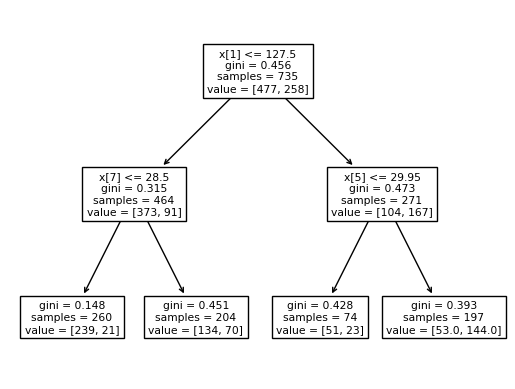

In [108]:
#plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dtc_gini.fit(X_train, Y_train)) 

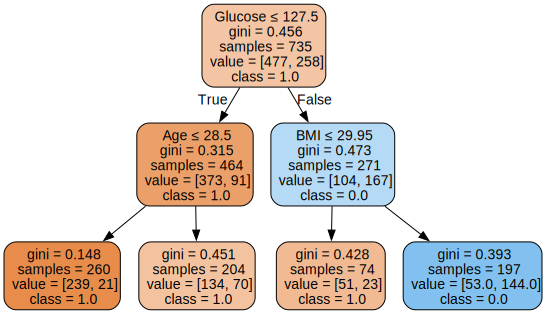

In [109]:
import graphviz 
class_names = Y_train.astype(str)
dot_data = tree.export_graphviz(dtc_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=class_names,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_predict,Y_test)
print("Confusion Matrix: \n\n",cm)

Confusion Matrix: 

 [[19  4]
 [ 4  6]]


In [70]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.60      0.60      0.60        10

    accuracy                           0.76        33
   macro avg       0.71      0.71      0.71        33
weighted avg       0.76      0.76      0.76        33

